### Initial Data Loading and Cleaning

In [14]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#define relative path to dataset
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [16]:
#saving data into pandas dataframes 
train = pd.read_csv(path_test)
test = pd.read_csv(path_train)


In [17]:
#printing shape
print(f'Train Shape:{train.shape}')
print(f'Test Shape:{test.shape}')

Train Shape:(7172, 785)
Test Shape:(27455, 785)


The training dataset consists of 27455 28x28 pixel grayscale images, including the associated label. The testing dataset consists of 7172 28x28 images. The label and pixels are split into X and y for both training and testing data. 

In [18]:
#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

The below is a function to find the indices of a specified label. 

In [19]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')
        

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [20]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

Inspecting examples for each letter in the dataset. 

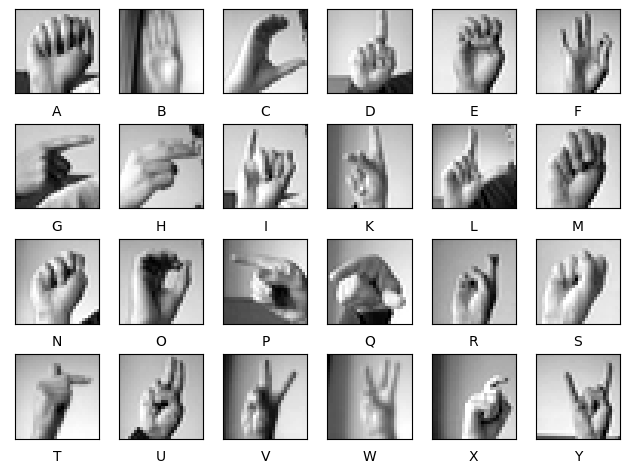

In [21]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0]
    #display first found image 
    ax[pos].imshow(X_train.iloc[idx,:].values.reshape(res),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

No additional data loading and cleaning steps required for this dataset. 

In [49]:
#summary statistics
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


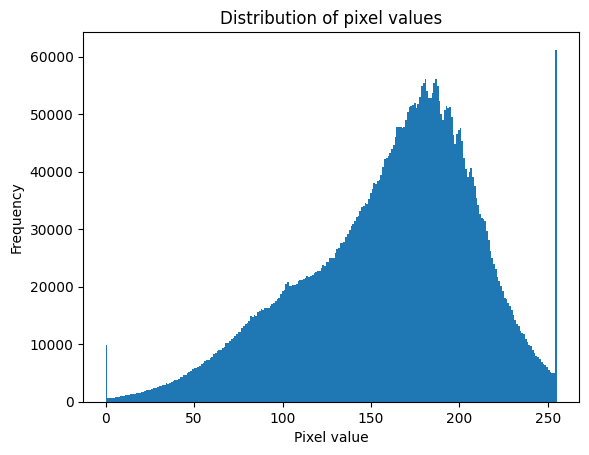

In [50]:
#plot the distribution of pixel values
pixel_values = train.iloc[:,1:].values
plt.hist(pixel_values.flatten(), bins=256)
plt.title("Distribution of pixel values")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

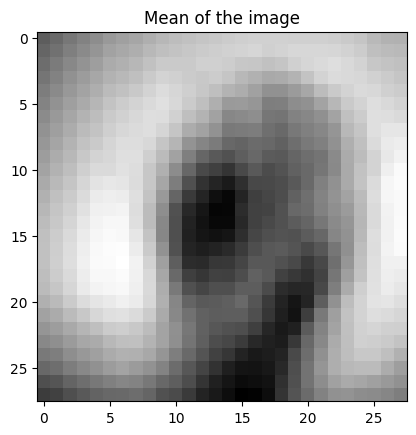

In [32]:
#plot the mean image
mean_image = np.mean(pixel_values, axis=0)
plt.imshow(mean_image.reshape(28,28), cmap='gray')
plt.title("Mean of the image")
plt.show()

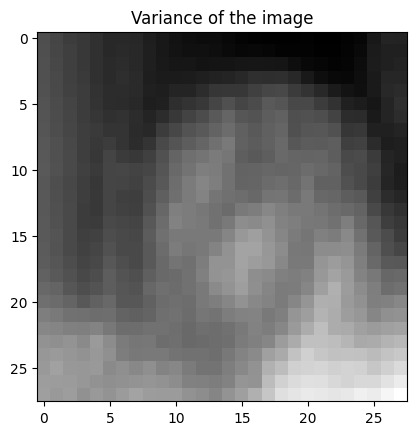

In [31]:
# plot the variance image
var_image = np.var(pixel_values, axis=0)
plt.imshow(var_image.reshape(28,28), cmap='gray')
plt.title("Variance of the image")
plt.show()

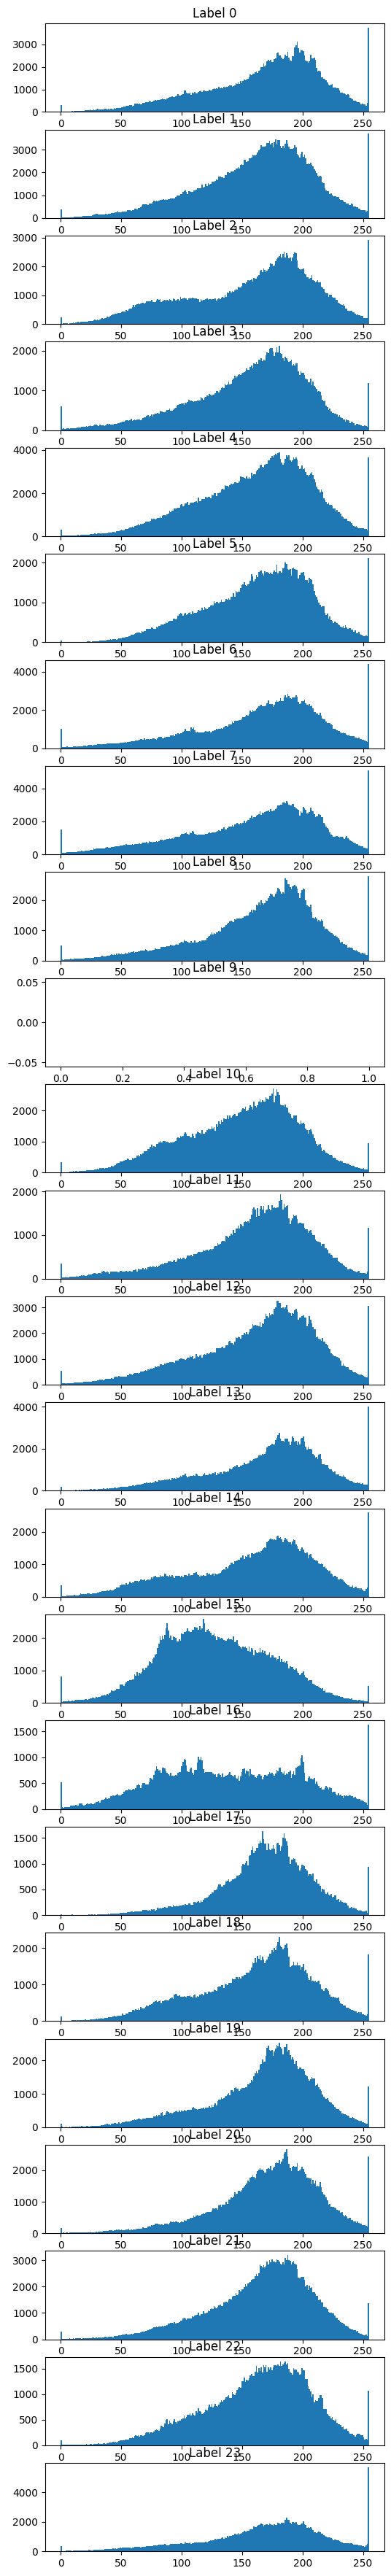

In [51]:
fig, axes = plt.subplots(len(train['label'].unique()),1, figsize=(6,45))
for i in range(len(train['label'].unique())):
    label_data = train[train['label'] == i]
    pixel_values = label_data.iloc[:,1:].values
    axes[i].hist(pixel_values.flatten(), bins=256)
    axes[i].set_title(f"Label {i}")
plt.show()